In [277]:
# Reference https://towardsdatascience.com/a-step-by-step-tutorial-using-k-means-to-extract-image-color-themes-43e04808b2be

In [278]:

import matplotlib.pyplot as plt
from matplotlib import image as img
image = img.imread('../images/rust_leaf.jpg')
image.shape

(533, 800, 3)

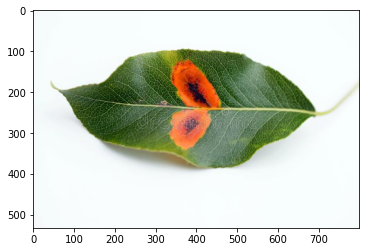

In [279]:
plt.imshow(image)

In [280]:
image.dtype   # dtype function tells how bytes in memory will be                         interpreted eg float/int
              # uint8 is an 8 bit unsigned integer ( 0 through 255 decimal)

dtype('uint8')

In [281]:
type(image)  # type function tells datatype

numpy.ndarray

In [282]:
print(image)

[[[245 249 252]
  [245 249 252]
  [245 249 252]
  ...
  [248 252 253]
  [248 252 253]
  [248 252 253]]

 [[245 249 252]
  [245 249 252]
  [245 249 252]
  ...
  [248 252 253]
  [248 252 253]
  [248 252 253]]

 [[245 249 252]
  [245 249 252]
  [245 249 252]
  ...
  [248 252 253]
  [248 252 253]
  [248 252 253]]

 ...

 [[244 248 249]
  [244 248 249]
  [244 248 249]
  ...
  [246 252 252]
  [246 252 252]
  [246 252 252]]

 [[244 248 249]
  [244 248 249]
  [244 248 249]
  ...
  [246 252 252]
  [246 252 252]
  [246 252 252]]

 [[244 248 249]
  [244 248 249]
  [244 248 249]
  ...
  [246 252 252]
  [246 252 252]
  [246 252 252]]]


In [283]:
image.shape  # Image Height*Width*3 (Channels / RGB)

(533, 800, 3)

In [284]:
image

array([[[245, 249, 252],
        [245, 249, 252],
        [245, 249, 252],
        ...,
        [248, 252, 253],
        [248, 252, 253],
        [248, 252, 253]],

       [[245, 249, 252],
        [245, 249, 252],
        [245, 249, 252],
        ...,
        [248, 252, 253],
        [248, 252, 253],
        [248, 252, 253]],

       [[245, 249, 252],
        [245, 249, 252],
        [245, 249, 252],
        ...,
        [248, 252, 253],
        [248, 252, 253],
        [248, 252, 253]],

       ...,

       [[244, 248, 249],
        [244, 248, 249],
        [244, 248, 249],
        ...,
        [246, 252, 252],
        [246, 252, 252],
        [246, 252, 252]],

       [[244, 248, 249],
        [244, 248, 249],
        [244, 248, 249],
        ...,
        [246, 252, 252],
        [246, 252, 252],
        [246, 252, 252]],

       [[244, 248, 249],
        [244, 248, 249],
        [244, 248, 249],
        ...,
        [246, 252, 252],
        [246, 252, 252],
        [246, 252, 252]]

In [285]:
image[:,:,0]   # red

array([[245, 245, 245, ..., 248, 248, 248],
       [245, 245, 245, ..., 248, 248, 248],
       [245, 245, 245, ..., 248, 248, 248],
       ...,
       [244, 244, 244, ..., 246, 246, 246],
       [244, 244, 244, ..., 246, 246, 246],
       [244, 244, 244, ..., 246, 246, 246]], dtype=uint8)

In [286]:
image[:,:,1]   # green

array([[249, 249, 249, ..., 252, 252, 252],
       [249, 249, 249, ..., 252, 252, 252],
       [249, 249, 249, ..., 252, 252, 252],
       ...,
       [248, 248, 248, ..., 252, 252, 252],
       [248, 248, 248, ..., 252, 252, 252],
       [248, 248, 248, ..., 252, 252, 252]], dtype=uint8)

In [287]:
image[:,:,2]   # blue

array([[252, 252, 252, ..., 253, 253, 253],
       [252, 252, 252, ..., 253, 253, 253],
       [252, 252, 252, ..., 253, 253, 253],
       ...,
       [249, 249, 249, ..., 252, 252, 252],
       [249, 249, 249, ..., 252, 252, 252],
       [249, 249, 249, ..., 252, 252, 252]], dtype=uint8)

In [288]:
# Rows & columns in ndarray

numrows = len(image)
numcols = len(image[0])
print(numrows)
print(numcols)


533
800


In [289]:
# Step 1 Detect/Extract Image's RGB

import pandas as pd
#construct to a dataframe for future data process
df = pd.DataFrame()
df['r']=pd.Series(image[:,:,0].flatten())
df['g']=pd.Series(image[:,:,1].flatten())
df['b']=pd.Series(image[:,:,2].flatten())
df.head()

,r,g,b
0,245,249,252
1,245,249,252
2,245,249,252
3,245,249,252
4,245,249,252


In [290]:
df.info()   # 533 rows * 800 columns = 426400 values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426400 entries, 0 to 426399
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   r       426400 non-null  uint8
 1   g       426400 non-null  uint8
 2   b       426400 non-null  uint8
dtypes: uint8(3)
memory usage: 1.2 MB


In [291]:
# Step 2 Data Preprocessing
# Whiten to standardise pixel data

from scipy.cluster.vq import whiten

df['r_whiten'] = whiten(df['r'])
df['g_whiten'] = whiten(df['g'])
df['b_whiten'] = whiten(df['b'])
df.head()

,r,g,b,r_whiten,g_whiten,b_whiten
0,245,249,252,3.366927,3.692264,2.811905
1,245,249,252,3.366927,3.692264,2.811905
2,245,249,252,3.366927,3.692264,2.811905
3,245,249,252,3.366927,3.692264,2.811905
4,245,249,252,3.366927,3.692264,2.811905


In [292]:
# Step 3 K-means cluster
# We aim to find 4 main colors from the image ## Assumption cz we
# know about data and our interest to find color other than  green
# based on the problem ##
# [Background, Shades of Green, Anomaly - rust, black spot etc]

from scipy.cluster.vq import kmeans
cluster_centers, distortion = kmeans(df[['r_whiten','g_whiten','b_whiten' ]], 4)
cluster_centers  # Since we want 4 clusters hence 4 cluster_centres for
                 # each r,g,b

# kmeans returns two values cluster_centers and distortions. For our purpose, only cluster_centers value is used.

array([[0.78442235, 1.24249811, 0.36732571],
       [3.38648355, 3.73477864, 2.80844936],
       [3.11047174, 1.55975116, 0.52729354],
       [1.63386531, 2.08047374, 1.07632872]])

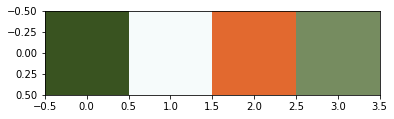

[(57, 83, 32), (246, 251, 251), (226, 105, 47), (118, 140, 96)]

In [293]:
# Restore R,G,B
# Cluster_center consist of standardized values that will need to restore to the real R, G, B to retrieve the colors.

# imshow could show image either within 0 to 1 float or 0 to 255 int. So we use int() to return the integer values for each cluster center.
# std() returns the standard deviation.

r_std, g_std, b_std = df[['r','g','b']].std()

colors = []

for color in cluster_centers:
    sr,sg,sb = color
    colors.append((int(sr*r_std),int(sg*g_std), int(sb*b_std)))

plt.imshow([colors])
plt.show()
colors

In [294]:
type(colors)

list

In [295]:
# Convert rgb color to closest valid CSS3 color name
import math

# std css3 colors
COLORS = (
    (0,128,0), # green
    (255,0,0), # red
    (0,0,255), # blue
    (255,255,0), # yellow
    (0,255,255), # cyan
    (255,165,0) # orange
)

def closest_color(rgb ):
    r, g, b = rgb
    color_diffs = []
    for color in COLORS:
        cr, cg, cb = color
        color_diff = math.sqrt(abs(r - cr)**2 + abs(g - cg)**2 + abs(b - cb)**2)
        color_diffs.append((color_diff, color))
    return min(color_diffs)[1]

In [296]:

css_std_color_list = []

for img_color in colors:
    css_std_color  = closest_color((img_color))
    css_std_color_list.append(css_std_color)

print(css_std_color_list)

[(0, 128, 0), (0, 255, 255), (255, 165, 0), (0, 128, 0)]


In [297]:
type(css_std_color_list)

list

In [298]:
len(css_std_color_list)

4

In [299]:
from webcolors import rgb_to_name
named_color_list = []

for color in css_std_color_list:
    named_color = rgb_to_name(color)
    named_color_list.append(named_color)

print("Colors detected in Image are", named_color_list)
# css3 - cascading style sheets

Colors detected in Image are ['green', 'cyan', 'orange', 'green']
